In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# 데이터 불러오기. y값은 이미 범주형으로 되어있음.
dat_wine=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                     'wine/wine.data',header=None)
dat_wine.columns = ['class label', 'alchohol', 'malic acid', 'ash', 
                    'alcalinity of ash', 'magnesium', 'total phenols', 
                    'flavanoids', 'nonflavanoid phenols', 
                    'proanthocyanins', 'color intensity', 'hue', 
                    'OD208', 'proline']  # Column names
print('class label:', np.unique(dat_wine['class label']))  # Class 출력

dat_wine.head()

class label: [1 2 3]


,class label,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


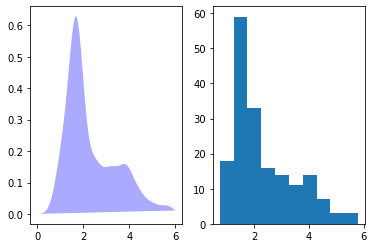

In [6]:
df2 = dat_wine[['class label', 'malic acid']]
X_plot = np.linspace(0, 6, 150)[:, np.newaxis]
#study = dat_wine[['class label']]
fin = dat_wine[['malic acid']]

fig, axs = plt.subplots(1, 2)

kde = KernelDensity(bandwidth=0.25).fit(fin)
log_dens = kde.score_samples(X_plot)
axs[1].hist(fin)
axs[0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')

plt.show()

In [7]:
from sklearn.neighbors import KNeighborsClassifier

target = dat_wine[['class label']]
attributes = dat_wine[['alchohol', 'malic acid', 'ash', 
                    'alcalinity of ash', 'magnesium', 'total phenols', 
                    'flavanoids', 'nonflavanoid phenols', 
                    'proanthocyanins', 'color intensity', 'hue', 
                    'OD208', 'proline']]

attributes.describe()

,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
#Warning이 너무 많이 떠서 숨겨줌
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# 항목마다 스케일이 다르기 때문에 동일한 정도로 학습에 반영하면 안될 것 같아 정규화를 진행
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
attributes[:] = scaler.fit_transform(attributes[:])
attributes.describe()

<ipython-input-8-d63ec6a4f360>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attributes[:] = scaler.fit_transform(attributes[:])
C:\Users\RetepMil\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
from sklearn.model_selection import train_test_split
training_data, validation_data , training_labels, validation_labels = train_test_split(attributes, target, random_state = 100)

print(len(training_data))
print(len(validation_data))
print(len(training_labels))
print(len(validation_labels))

133
45
133
45


In [10]:
#KNN 모델 생성
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(training_data, training_labels) #학습

print(knn.score(validation_data, validation_labels)) #모델의 정확도 평가를 위해 validation set을 사용

0.9333333333333333


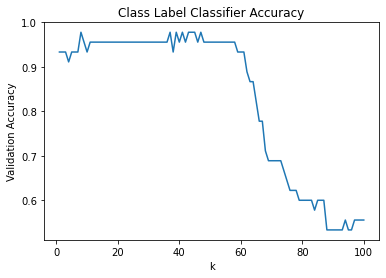

In [11]:
#k에 다양한 값을 대입하는 경우
import matplotlib.pyplot as plt

k_list = range(1,101)
accuracies = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(training_data, training_labels)
  accuracies.append(knn.score(validation_data, validation_labels))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Class Label Classifier Accuracy")
plt.show()

#k가 커질수록 underfitting이 생겨서 정확도가 떨어지는 걸 확인할 수 있다

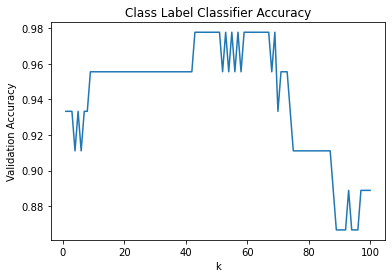

In [12]:
#k에 다양한 값을 대입하는 경우
import matplotlib.pyplot as plt

k_list = range(1,101)
accuracies = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
  knn.fit(training_data, training_labels)
  accuracies.append(knn.score(validation_data, validation_labels))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Class Label Classifier Accuracy")
plt.show()

#weights 파라미터에 'distance'를 주면 k가 커질수록 underfitting이 생기는 경향은 여전히 있지만, k가 40과 60사이일 때 성능이 더 좋아지는 모습을 관찰할 수 있었다.

In [132]:
#출처: http://hleecaster.com/ml-knn-classifier-example/